# **Import And Pre-Processing**

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import StratifiedKFold,cross_val_score

from sklearn.ensemble import BaggingClassifier


In [ ]:
Pima_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
Pima_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
X = Pima_dataset.drop(columns='Outcome', axis=1)
Y = Pima_dataset['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
# URL: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
# Estimate mutual information for a discrete target variable.
# Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. 
# It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state = 0)
mutual_info


array([0.01555395, 0.11340361, 0.01509219, 0.01042158, 0.02731686,
       0.07740352, 0.        , 0.04601336])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Glucose                     0.113404
BMI                         0.077404
Age                         0.046013
Insulin                     0.027317
Pregnancies                 0.015554
BloodPressure               0.015092
SkinThickness               0.010422
DiabetesPedigreeFunction    0.000000
dtype: float64

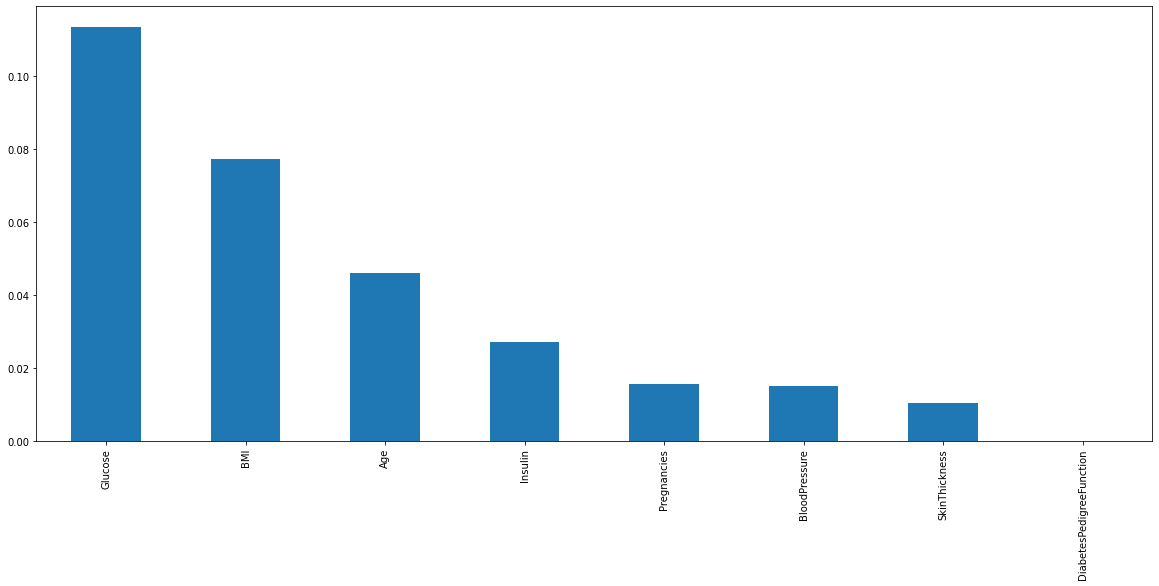

In [ ]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=0)
imputer = imputer.fit(Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = imputer.transform(Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])


In [ ]:
Pima_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
print("number of rows with glucose value 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Glucose'] == 0])))
print("number of rows with missing BloodPressure 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['BloodPressure'] == 0])))
print("number of rows with missing skin thikness 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['SkinThickness'] == 0])))
print("number of rows with Insulin 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Insulin'] == 0])))
print("number of rows with BMI 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['BMI'] == 0])))
print("number of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['DiabetesPedigreeFunction'] == 0])))
print("number of rows with age 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Age'] == 0])))


number of rows with glucose value 0 is: 0
number of rows with missing BloodPressure 0 is: 0
number of rows with missing skin thikness 0 is: 0
number of rows with Insulin 0 is: 0
number of rows with BMI 0 is: 0
number of rows with DiabetesPedigreeFunction 0 is: 0
number of rows with age 0 is: 0


In [ ]:
Pima_dataset.drop(columns='DiabetesPedigreeFunction',axis=1, inplace=True)

In [ ]:
Pima_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,54,1


In [ ]:
X = Pima_dataset.drop(columns='Insulin', axis=1)
Y = Pima_dataset['Insulin']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
XGB = XGBRegressor(max_depth=10,learning_rate=0.1)
XGB.fit(X_train,y_train)

predictions_xgb = XGB.predict(X_test)


[20:40:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:

#mean square error
final_mse = mean_squared_error(y_test, predictions_xgb)
#mean square error
final_rmse = np.sqrt(final_mse)
final_rmse

69.01115169843999

In [ ]:
RTML_dataset = pd.read_excel('/content/Diabetes dataset from RTML .xlsx')

In [ ]:
RTML_dataset.isna().sum()

Pregnancies        0
Glucose            0
BloodPressure      0
SkinThickness      0
Insulin          109
BMI                0
Age                0
Outcome            0
dtype: int64

In [ ]:
X1 = RTML_dataset.drop(columns='Insulin', axis=1)
Y1 = RTML_dataset['Insulin']

In [ ]:
Y1 = XGB.predict(X1)

In [ ]:
Y1.shape

(109,)

In [ ]:
Y2= pd.DataFrame(Y1)

In [ ]:
Y2.columns=['Insulin']

In [ ]:
Y2.head()

,Insulin
0,169.939316
1,156.359818
2,93.892448
3,109.821793
4,111.143501


In [ ]:
Y2.shape

(109, 1)

# **Merging The insulin column**

In [ ]:
RTML_dataset.columns
RTML_dataset.shape

(109, 8)

In [ ]:
RTML_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,5,88.2,106.0,4.8,NaN,14.794213,50,0
1,6,73.8,74.0,7.5,NaN,24.851410,50,0
2,1,86.4,87.0,18.4,NaN,41.621307,30,0
3,1,97.2,71.0,15.0,NaN,22.608427,28,0
4,5,90.0,96.0,7.6,NaN,19.154528,50,0


In [ ]:
RTML_dataset.drop(columns='Insulin',axis=1, inplace=True)

In [ ]:
RTML_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age,Outcome
0,5,88.2,106.0,4.8,14.794213,50,0
1,6,73.8,74.0,7.5,24.851410,50,0
2,1,86.4,87.0,18.4,41.621307,30,0
3,1,97.2,71.0,15.0,22.608427,28,0
4,5,90.0,96.0,7.6,19.154528,50,0


In [ ]:
Y2.columns
Y2.shape

(109, 1)

In [ ]:
Y2.head()

,Insulin
0,169.939316
1,156.359818
2,93.892448
3,109.821793
4,111.143501


In [ ]:
Insulin_Merged = pd.concat([RTML_dataset, Y2], axis=1)


Insulin_Merged.columns



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'Age', 'Outcome', 'Insulin'],
      dtype='object')

In [ ]:
Insulin_Merged.shape

(109, 8)

In [ ]:
Insulin_Merged.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age,Outcome,Insulin
0,5,88.2,106.0,4.8,14.794213,50,0,169.939316
1,6,73.8,74.0,7.5,24.851410,50,0,156.359818
2,1,86.4,87.0,18.4,41.621307,30,0,93.892448
3,1,97.2,71.0,15.0,22.608427,28,0,109.821793
4,5,90.0,96.0,7.6,19.154528,50,0,111.143501
5,0,70.2,83.0,6.7,23.051801,18,0,139.253876
6,3,84.6,74.0,4.2,14.130982,40,0,163.274994
7,3,95.4,84.0,15.0,39.700324,30,0,100.884689
8,0,88.2,74.0,4.5,16.567359,18,0,139.365509
9,0,79.2,67.0,12.5,21.518855,18,0,82.253777


# **Merge with PIMA DATASET**

In [ ]:
RTML_Merged = Insulin_Merged[["Pregnancies", "Glucose", "BloodPressure","SkinThickness","Insulin", "BMI", "Age","Outcome"]]

In [ ]:
RTML_Merged.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,5,88.2,106.0,4.8,169.939316,14.794213,50,0
1,6,73.8,74.0,7.5,156.359818,24.851410,50,0
2,1,86.4,87.0,18.4,93.892448,41.621307,30,0
3,1,97.2,71.0,15.0,109.821793,22.608427,28,0
4,5,90.0,96.0,7.6,111.143501,19.154528,50,0
5,0,70.2,83.0,6.7,139.253876,23.051801,18,0
6,3,84.6,74.0,4.2,163.274994,14.130982,40,0
7,3,95.4,84.0,15.0,100.884689,39.700324,30,0
8,0,88.2,74.0,4.5,139.365509,16.567359,18,0
9,0,79.2,67.0,12.5,82.253777,21.518855,18,0


In [ ]:
pieces = {"x": Pima_dataset, "y": RTML_Merged}

PIMA_RTML = pd.concat(pieces)

In [ ]:
PIMA_RTML.shape

(877, 8)

In [ ]:
PIMA_RTML.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
x 0            6    148.0      72.000000       35.00000  155.548223   
  1            1     85.0      66.000000       29.00000  155.548223   
  2            8    183.0      64.000000       29.15342  155.548223   
  3            1     89.0      66.000000       23.00000   94.000000   
  4            0    137.0      40.000000       35.00000  168.000000   
  5            5    116.0      74.000000       29.15342  155.548223   
  6            3     78.0      50.000000       32.00000   88.000000   
  7           10    115.0      72.405184       29.15342  155.548223   
  8            2    197.0      70.000000       45.00000  543.000000   
  9            8    125.0      96.000000       29.15342  155.548223   

           BMI  Age  Outcome  
x 0  33.600000   50        1  
  1  26.600000   31        0  
  2  23.300000   32        1  
  3  28.100000   21        0  
  4  43.100000   33        1  
  5  25.600000   30        0  
  6  31.000000   26        1  
  7  35.300000   29        0  
  8  30.500000   53        1  
  9  32.457464   54        1

# **Split the Data**

In [ ]:
X = PIMA_RTML.drop(columns='Outcome', axis=1)
Y = PIMA_RTML['Outcome']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


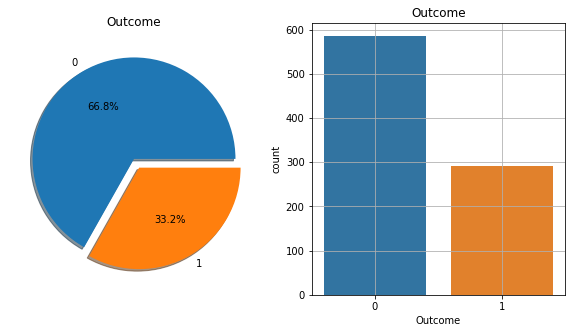

In [ ]:
f,ax = plt.subplots(1,2, figsize=(10,5))
PIMA_RTML['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome', data=PIMA_RTML, ax=ax[1])
ax[1].set_title('Outcome')
N,P = PIMA_RTML['Outcome'].value_counts()

plt.grid()
plt.show()

In [ ]:
PIMA_RTML['Outcome'].value_counts()

0    586
1    291
Name: Outcome, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0, stratify =Y)

In [ ]:
print(X.shape, X_train.shape,y_train.shape, X_test.shape)

(877, 7) (701, 7) (701,) (176, 7)


# **Smote Implementation**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE( sampling_strategy='minority',random_state=0)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

np.bincount(y_smote)

array([468, 468])

In [ ]:

# Befor smote
y_train.value_counts()

0    468
1    233
Name: Outcome, dtype: int64

In [ ]:

# after smote

y_smote.value_counts()

1    468
0    468
Name: Outcome, dtype: int64

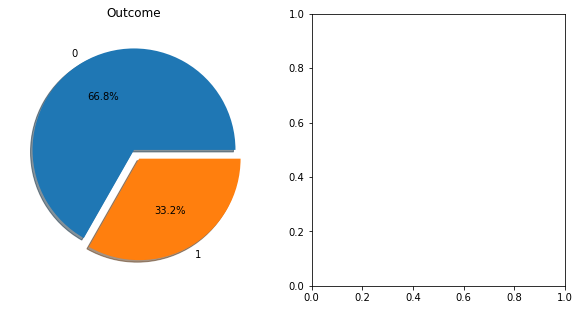

In [ ]:
# outcome before smote
f,ax = plt.subplots(1,2, figsize=(10,5))
y_train.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')



plt.show()

**# After smote**

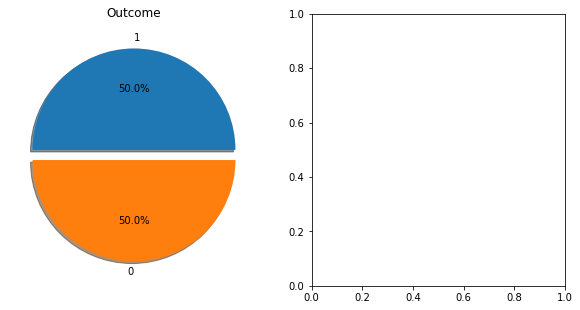

In [ ]:
# outcome
f,ax = plt.subplots(1,2, figsize=(10,5))
y_smote.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')



plt.show()

In [ ]:

# Befor smote
y_train.value_counts()

0    468
1    233
Name: Outcome, dtype: int64

In [ ]:
# after smote

y_smote.value_counts()

1    468
0    468
Name: Outcome, dtype: int64

#  **Grid search on svm (PERFECTLY DONE)**



In [ ]:
# We need to scale correctly (We will use MinMax Scaler to do this)
cols_to_scale = ['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Age']
scaler = MinMaxScaler()
scaler.fit(X_smote[cols_to_scale])
X_smote[cols_to_scale] = scaler.transform(X_smote[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [ ]:
svm_clf = svm.SVC()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
svm_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
 
# fitting the model for grid search
svm_grid.fit(X_smote, y_smote)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.798 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.770 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.781 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.765 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.781 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.765 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.781 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.749 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.765 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.782 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
svm_grid.best_estimator_
svm_bestgrid=svm_grid.best_estimator_
svm_bestgrid

SVC(C=1000, gamma=1)

In [ ]:
y_pred=svm_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[95 23]
 [19 39]]
Accuracy Score 0.7613636363636364
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       118
           1       0.63      0.67      0.65        58

    accuracy                           0.76       176
   macro avg       0.73      0.74      0.73       176
weighted avg       0.77      0.76      0.76       176



**K-fold cross validation(SVM)**

In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(svm_grid,X,Y,cv=skfold)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.664 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.671 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.671 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.671 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.671 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.671 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.671 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
cv_score

array([0.75      , 0.67613636, 0.78857143, 0.78857143, 0.85714286])

In [ ]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7720844155844157 +/- 0.05911401146792515


# **Bagging Decision tree(PERFECTLY DONE)**


In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
bagging.fit(X_smote,y_smote)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [ ]:
y_pred=bagging.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[96 22]
 [18 40]]
Accuracy Score 0.7727272727272727
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       118
           1       0.65      0.69      0.67        58

    accuracy                           0.77       176
   macro avg       0.74      0.75      0.75       176
weighted avg       0.78      0.77      0.77       176



**K-fold cross validation (Bagging)**

In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(bagging,X,Y,cv=skfold)

In [ ]:
cv_score

array([0.75      , 0.68181818, 0.78857143, 0.79428571, 0.88      ])

In [ ]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7789350649350648 +/- 0.06451596702899699


# **Decision Tree(Perfectly Done)**

Depth =  2 , Training Accuracy =  0.7596153846153846 , Test Accuracy =  0.7556818181818182 , Diff =  0.3933566433566349  %
Depth =  3 , Training Accuracy =  0.8098290598290598 , Test Accuracy =  0.7102272727272727 , Diff =  9.960178710178713  %
Depth =  4 , Training Accuracy =  0.844017094017094 , Test Accuracy =  0.7443181818181818 , Diff =  9.969891219891224  %
Depth =  5 , Training Accuracy =  0.8685897435897436 , Test Accuracy =  0.7386363636363636 , Diff =  12.995337995337996  %
Depth =  6 , Training Accuracy =  0.8878205128205128 , Test Accuracy =  0.7727272727272727 , Diff =  11.509324009324008  %
Depth =  7 , Training Accuracy =  0.9038461538461539 , Test Accuracy =  0.6988636363636364 , Diff =  20.49825174825175  %
Depth =  8 , Training Accuracy =  0.9273504273504274 , Test Accuracy =  0.7272727272727273 , Diff =  20.00777000777001  %
Depth =  9 , Training Accuracy =  0.9412393162393162 , Test Accuracy =  0.7613636363636364 , Diff =  17.98756798756799  %
Depth =  10 , Training

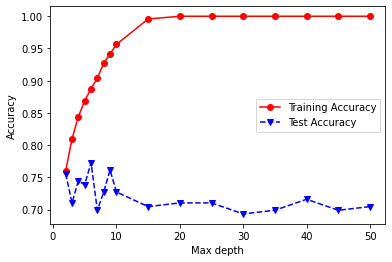

In [ ]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_smote, y_smote)
    y_predTrain = clf.predict(X_smote)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_smote, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [ ]:
# create a model 
dt = DecisionTreeClassifier(max_depth = 2, random_state=0)
dt.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_smote, y_smote))

# Accuracy on Test
print("Testing Accuracy is: ", dt.score(X_test, y_test))
X_test_prediction  = dt.predict(X_test) 

print(classification_report(y_test, X_test_prediction))

Training Accuracy is:  0.7596153846153846
Testing Accuracy is:  0.7556818181818182
              precision    recall  f1-score   support

           0       0.80      0.86      0.82       118
           1       0.65      0.55      0.60        58

    accuracy                           0.76       176
   macro avg       0.72      0.70      0.71       176
weighted avg       0.75      0.76      0.75       176



In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(dt,X,Y,cv=skfold)


In [ ]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7618051948051947 +/- 0.05872920767991634


# **Logistic** **Regression(Perfectly Done)**

In [ ]:
lr = LogisticRegression()
from sklearn.model_selection import GridSearchCV

grid_params = { 'max_iter' : [10000],
               'warm_start' : ['False','True'],
               'penalty' : ['l1', 'l2', 'elasticnet', 'none']
               
               }

lr_grid = GridSearchCV(
    LogisticRegression(),
    grid_params,
    verbose  = 1,
    scoring='accuracy',
    cv = 3,
    n_jobs = -1
    )
    
lr_grid.fit(X_smote, y_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver 

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'warm_start': ['False', 'True']},
             scoring='accuracy', verbose=1)

In [ ]:
lr_bestgrid=lr_grid.best_estimator_

In [ ]:
y_pred=lr_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[93 25]
 [20 38]]
Accuracy Score 0.7443181818181818
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       118
           1       0.60      0.66      0.63        58

    accuracy                           0.74       176
   macro avg       0.71      0.72      0.72       176
weighted avg       0.75      0.74      0.75       176



**Logistic regression K fold**

In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(lr_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7925649350649351 +/- 0.04795319793409606


# **Gausien Naive Bays(Perfectly Done)**

In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(GaussianNB(), 
                 param_grid=params_NB, 
                 cv=3,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_smote, y_smote)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [ ]:
gs_NB.best_params_

{'var_smoothing': 0.04328761281083057}

In [ ]:
gs_NB=gs_NB.best_estimator_

In [ ]:
y_pred=gs_NB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[91 27]
 [23 35]]
Accuracy Score 0.7159090909090909
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       118
           1       0.56      0.60      0.58        58

    accuracy                           0.72       176
   macro avg       0.68      0.69      0.68       176
weighted avg       0.72      0.72      0.72       176



In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(GaussianNB(),X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.762948051948052 +/- 0.059505518480507336



# **Random Forest(Perfectly Done)**

In [ ]:
###The hyperparameter we got from grid search
rf=RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
### fit the randomized model
rf.fit(X_smote, y_smote)


RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[101  17]
 [ 20  38]]
Accuracy Score 0.7897727272727273
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       118
           1       0.69      0.66      0.67        58

    accuracy                           0.79       176
   macro avg       0.76      0.76      0.76       176
weighted avg       0.79      0.79      0.79       176



In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(rf,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7788961038961039 +/- 0.04725424214010976


# **XG Boost(Perfectly Done)**

In [ ]:
###The hyperparameter we got from grid search
from xgboost import XGBClassifier
xgbc = XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_smote, y_smote)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=xgbc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[96 22]
 [19 39]]
Accuracy Score 0.7670454545454546
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       118
           1       0.64      0.67      0.66        58

    accuracy                           0.77       176
   macro avg       0.74      0.74      0.74       176
weighted avg       0.77      0.77      0.77       176



In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(xgbc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7720714285714285 +/- 0.050528537231128


# **Ada Boost(Perfectly Done)**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#lrc = LogisticRegression(max_iter=1100)
abc = AdaBoostClassifier(n_estimators=50,base_estimator=rf,learning_rate=1).fit(X_smote, y_smote)

print(classification_report(y_test,abc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       118
           1       0.67      0.64      0.65        58

    accuracy                           0.78       176
   macro avg       0.75      0.74      0.75       176
weighted avg       0.78      0.78      0.78       176



In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(abc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7777662337662339 +/- 0.05031846379763886


# **KNN(Perfectly Done)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=74)
knn.fit(X_smote, y_smote)

# accuracy score on the test data
knn_prediction = knn.predict(X_test) 
knn_prediction_accuracy = accuracy_score(knn_prediction, y_test) 
print('Accuracy score of Test data: ', knn_prediction_accuracy)
print(classification_report(y_test, knn_prediction)) 

Accuracy score of Test data:  0.7329545454545454
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       118
           1       0.58      0.71      0.64        58

    accuracy                           0.73       176
   macro avg       0.71      0.73      0.71       176
weighted avg       0.75      0.73      0.74       176



In [ ]:
k = range(1, 100)
train_acc = []
test_acc = []
for x in k:
    knn_clf = KNeighborsClassifier(n_neighbors = x) # Euclidean Distance Metric
    knn_clf.fit(X_smote, y_smote)
    y_pred = knn_clf.predict(X_test)
    train_acc.append(accuracy_score(y_smote, knn_clf.predict(X_smote)))
    test_acc.append(accuracy_score(y_test, y_pred))

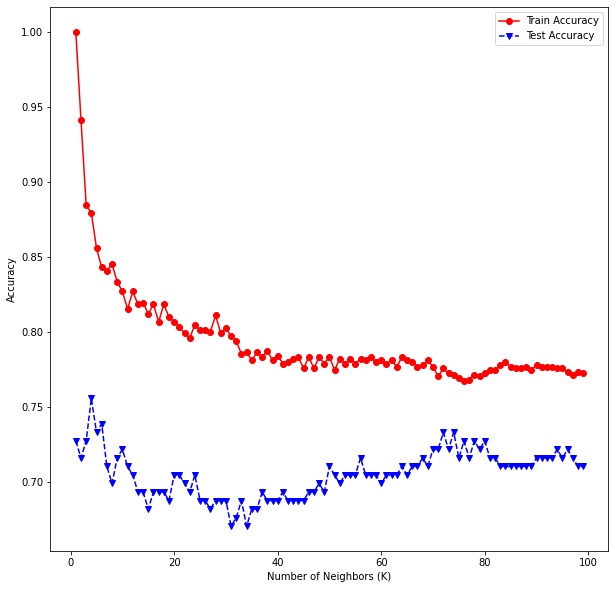

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(k,train_acc,'ro-',k,test_acc,'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy');

In [ ]:
for x in k:
    print('Number of neighbors = ', x, "Train accuracy = ", train_acc[x-1], "Test Accuracy = ", test_acc[x-1], "Difference = ",
         (abs(train_acc[x-1] - test_acc[x-1])*100), "%")

Number of neighbors =  1 Train accuracy =  1.0 Test Accuracy =  0.7272727272727273 Difference =  27.27272727272727 %
Number of neighbors =  2 Train accuracy =  0.9412393162393162 Test Accuracy =  0.7159090909090909 Difference =  22.533022533022528 %
Number of neighbors =  3 Train accuracy =  0.8846153846153846 Test Accuracy =  0.7272727272727273 Difference =  15.73426573426573 %
Number of neighbors =  4 Train accuracy =  0.8792735042735043 Test Accuracy =  0.7556818181818182 Difference =  12.359168609168602 %
Number of neighbors =  5 Train accuracy =  0.8557692307692307 Test Accuracy =  0.7329545454545454 Difference =  12.281468531468532 %
Number of neighbors =  6 Train accuracy =  0.842948717948718 Test Accuracy =  0.7386363636363636 Difference =  10.43123543123543 %
Number of neighbors =  7 Train accuracy =  0.8408119658119658 Test Accuracy =  0.7102272727272727 Difference =  13.058469308469311 %
Number of neighbors =  8 Train accuracy =  0.8450854700854701 Test Accuracy =  0.6988636

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [74],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose  = 1,
    cv = 10,
    return_train_score=False,
    scoring= 'accuracy',
    n_jobs = -1
    )
    
knn_grid.fit(X_smote, y_smote)
    

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [74],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [ ]:
knn_grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=74, weights='distance')

In [ ]:
knn_bestgrid=knn_grid.best_estimator_

In [ ]:
knn_bestgrid

KNeighborsClassifier(metric='manhattan', n_neighbors=74, weights='distance')

In [ ]:
y_pred=knn_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[84 34]
 [18 40]]
Accuracy Score 0.7045454545454546
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       118
           1       0.54      0.69      0.61        58

    accuracy                           0.70       176
   macro avg       0.68      0.70      0.68       176
weighted avg       0.73      0.70      0.71       176



In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(knn_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7869090909090909 +/- 0.06714104345813365


# **Soft Voting**

In [ ]:
from sklearn.ensemble import VotingClassifier
estimator = []
estimator.append(('RF',RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)))
estimator.append(('SVC', SVC(C=100, gamma=0.1,probability=True)))
estimator.append(('ABC',AdaBoostClassifier(n_estimators=50,base_estimator=rf,learning_rate=1)))
estimator.append(('Bag',BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)))



# Voting Classifier with soft voting
Hyper_vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
Hyper_vot_soft.fit(X_smote, y_smote)
y_pred = Hyper_vot_soft.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Soft Voting Score  0
[[100  18]
 [ 20  38]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       118
           1       0.68      0.66      0.67        58

    accuracy                           0.78       176
   macro avg       0.76      0.75      0.75       176
weighted avg       0.78      0.78      0.78       176



In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(Hyper_vot_soft,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7777467532467532 +/- 0.04425381415725655


## **ZeroR**


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 20)
dummy_clf.fit(X_smote, y_smote)
y_pred = dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_smote, dummy_clf.predict(X_smote)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       118
           1       0.00      0.00      0.00        58

    accuracy                           0.67       176
   macro avg       0.34      0.50      0.40       176
weighted avg       0.45      0.67      0.54       176

Train Accuracy:  0.5
Test Accuracy:  0.6704545454545454


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = dummy_clf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

## **Auc Curve**

In [ ]:
DTC2=BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
DTC2.fit(X_smote, y_smote)


DTC3=DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=0)
DTC3.fit(X_smote, y_smote)

rf_randomcv2= RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
rf_randomcv2.fit(X_smote, y_smote)

SVC2=SVC(C=100, gamma=0.1,probability=True)
SVC2.fit(X_smote, y_smote)

lr_grid2= lr_bestgrid
lr_grid2.fit(X_smote, y_smote)

gs_NB2=gs_NB
gs_NB2.fit(X_smote, y_smote)

XGB_clf2=XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)
XGB_clf2.fit(X_smote, y_smote)

knn_grid2= KNeighborsClassifier(n_neighbors=95,metric='manhattan', weights='distance')
knn_grid2.fit(X_smote, y_smote)


KNeighborsClassifier(metric='manhattan', n_neighbors=95, weights='distance')

In [ ]:
final_roc_auc = []

In [ ]:
#use the model to predict the target values for test dataset. We are storing the predicted class by all the models and we will use it to get the ROC AUC score
probas1 = dummy_clf.predict_proba(X_test)[:, 1]
probas2 = DTC2.predict_proba(X_test)[:, 1]
probas3 = knn_grid2.predict_proba(X_test)[:, 1]
probas4 = SVC2.predict_proba(X_test)[:, 1]
probas5 = rf_randomcv2.predict_proba(X_test)[:, 1]
probas6 = gs_NB2.predict_proba(X_test)[:, 1]
probas7 = abc.predict_proba(X_test)[:, 1]
probas8 = XGB_clf2.predict_proba(X_test)[:, 1]
probas9 = lr_grid2.predict_proba(X_test)[:, 1]
probas10 = Hyper_vot_soft.predict_proba(X_test)[:, 1]
probas11 = DTC3.predict_proba(X_test)[:, 1]

In [ ]:
# get False Positive Rates and True Postive rates for the Classifiers because these will be used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, probas1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, probas2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, probas3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, probas4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, probas5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, probas6)
false_positive_rate7, true_positive_rate7, threshold6 = roc_curve(y_test, probas7)
false_positive_rate8, true_positive_rate8, threshold6 = roc_curve(y_test, probas8)
false_positive_rate9, true_positive_rate9, threshold6 = roc_curve(y_test, probas9)
false_positive_rate10, true_positive_rate10, threshold6 = roc_curve(y_test, probas10)
false_positive_rate11, true_positive_rate11, threshold6 = roc_curve(y_test, probas11)

In [ ]:
print('roc_auc_score for ZeroR Classifier: ', roc_auc_score(y_test, probas1))
print('roc_auc_score for Bagging DecisionTree: ', roc_auc_score(y_test, probas2))
print('roc_auc_score for KNN Classifier: ', roc_auc_score(y_test, probas3))
print('roc_auc_score for SVM Classifier: ', roc_auc_score(y_test, probas4))
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(y_test, probas5))
print('roc_auc_score for Naive Bays Classifier: ', roc_auc_score(y_test, probas6))
print('roc_auc_score for Ada Boost Classifier: ', roc_auc_score(y_test, probas7))
print('roc_auc_score for XG Boost Classifier: ', roc_auc_score(y_test, probas8))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, probas9))
print('roc_auc_score for Voting Classifier: ', roc_auc_score(y_test, probas10))
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, probas11))

roc_auc_score for ZeroR Classifier:  0.5
roc_auc_score for Bagging DecisionTree:  0.8443892460549386
roc_auc_score for KNN Classifier:  0.8268556399766218
roc_auc_score for SVM Classifier:  0.8322618351841028
roc_auc_score for Random Forest Classifier:  0.8406633547632962
roc_auc_score for Naive Bays Classifier:  0.8090298071303331
roc_auc_score for Ada Boost Classifier:  0.8362799532437171
roc_auc_score for XG Boost Classifier:  0.831092928112215
roc_auc_score for Logistic Regression:  0.8363530099357102
roc_auc_score for Voting Classifier:  0.8448275862068966
roc_auc_score for DecisionTree:  0.7662916423144359


In [ ]:
final_roc_auc.append({'model_name': 'ZeroR Classifier', 'fpr': false_positive_rate1, 'tpr': true_positive_rate1, 'auc': roc_auc_score(y_test, probas1)})
final_roc_auc.append({'model_name': 'Bagging Decision Tree Classifier', 'fpr': false_positive_rate2, 'tpr': true_positive_rate2, 'auc': roc_auc_score(y_test, probas2)})
final_roc_auc.append({'model_name': 'KNeighbors Classifier', 'fpr': false_positive_rate3, 'tpr': true_positive_rate3, 'auc': roc_auc_score(y_test, probas3)})
final_roc_auc.append({'model_name': 'SVM Classifier', 'fpr': false_positive_rate4, 'tpr': true_positive_rate4, 'auc': roc_auc_score(y_test, probas4)})
final_roc_auc.append({'model_name': 'Random Forest Classifier', 'fpr': false_positive_rate5, 'tpr': true_positive_rate5, 'auc': roc_auc_score(y_test, probas5)})
final_roc_auc.append({'model_name': 'Naive Bays Classifier', 'fpr': false_positive_rate6, 'tpr': true_positive_rate6, 'auc': roc_auc_score(y_test, probas6)})
final_roc_auc.append({'model_name': 'Ada Boost Classifier', 'fpr': false_positive_rate7, 'tpr': true_positive_rate7, 'auc': roc_auc_score(y_test, probas7)})
final_roc_auc.append({'model_name': 'XG Boost Classifier', 'fpr': false_positive_rate8, 'tpr': true_positive_rate8, 'auc': roc_auc_score(y_test, probas8)})
final_roc_auc.append({'model_name': 'Logistic Regression', 'fpr': false_positive_rate9, 'tpr': true_positive_rate9, 'auc': roc_auc_score(y_test, probas9)})
final_roc_auc.append({'model_name': 'Voting Classifier', 'fpr': false_positive_rate10, 'tpr': true_positive_rate10, 'auc': roc_auc_score(y_test, probas10)})
final_roc_auc.append({'model_name': 'Decision Tree Classifier', 'fpr': false_positive_rate11, 'tpr': true_positive_rate11, 'auc': roc_auc_score(y_test, probas11)})

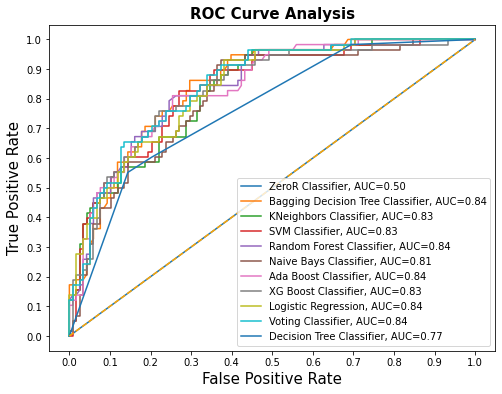

In [ ]:
fig = plt.figure(figsize=(8,6))

for m in final_roc_auc:
    plt.plot(m['fpr'], 
             m['tpr'], 
             label="{}, AUC={:.2f}".format(m['model_name'], m['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

In [ ]:
# export the figure.
fig.savefig('multiple_roc_curves.png')